In [1]:
from torchvision import datasets , transforms

### Imported library to load data

In [3]:
from  torchvision  import datasets , transforms
from torch.utils.data import DataLoader , random_split
transform = transforms.ToTensor()
train_dataset = datasets.MNIST( root="./data", train =True, download =True , transform=transform)
test_dataset = datasets.MNIST( root="./data", train= False, download=True , transform =transform)
train_data , val_data = random_split( train_dataset , [54000, 6000])
train_loader =DataLoader( train_data , batch_size=64 , shuffle =True)
val_loader =DataLoader( val_data , batch_size=64 , shuffle= False)
test_loader = DataLoader(test_dataset , batch_size=64 , shuffle=False)

### loaded the MNIST data set and separated validation part 

also created DataLoaders for:
train_loader- for training the model in batches
val_loader- for evaluating performance 
test_loader- to test final performance

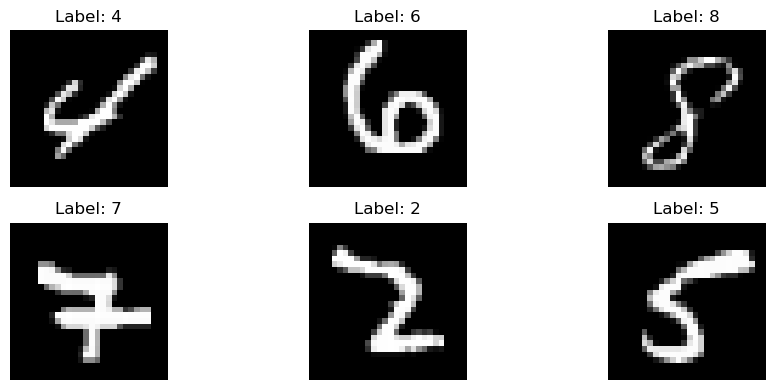

In [4]:
import matplotlib.pyplot as plt
images , labels = next( iter(train_loader))
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot( 2 , 3 , i + 1)
    plt.imshow( images[i].squeeze() , cmap ='gray' ) 
    plt.title( f"Label: {labels[i].item()}")
    plt.axis('off')



plt.tight_layout()
plt.show()

### visualised sample images

In [5]:
import torch
import torch.nn as nn
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier , self).__init__()
        self.fc1 = nn.Linear(28 * 28 , 128)  
        self.fc2= nn.Linear(128 , 64)       
        self.fc3= nn.Linear( 64 , 10)        

    def forward(self , x):
        x= x.view(-1 , 28 * 28)           
        x= torch.relu(self.fc1(x))        
        x=torch.relu(self.fc2(x))      
        x= self.fc3(x)                   
        return x
model = DigitClassifier()

### made the neural network
The model architecture is
- Input layer with 784 neurons ( 28×28 flattened image)
- Hidden Layer 1: 128 neurons with ReLU activation
- Hidden Layer 2 : 64 neurons with ReLU activation
- Output Layer : 10 neurons ( one for each digit class 0–9)

In [6]:
import torch.optim as  optim
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam( model.parameters() , lr=0.001)

### Loss Function and Optimizer

-Loss Function : CrossEntropyLoss
- Optimizer: Adam
The learning rate is set to 0.001 

In [8]:
epochs =5
for epoch in range( epochs):
    running_loss =0.0
    for images , labels in train_loader:
        optimizer.zero_grad()
        outputs =model( images)
        loss =loss_function( outputs , labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")

Epoch 1/5, Loss: 299.5806
Epoch 2/5, Loss: 125.3931
Epoch 3/5, Loss: 88.5061
Epoch 4/5, Loss: 66.1827
Epoch 5/5, Loss: 53.1904


### Trained the model
I trained the model for 5 epochs.  

In [9]:
model.eval()
correct =0
total = 0
with torch.no_grad():
    for images , labels in val_loader:
        outputs= model( images)
        _, predicted =torch.max( outputs , 1)
        total +=labels.size(0)
        correct +=(predicted == labels).sum().item()

val_accuracy =100 * correct / total
print(f"Validation Accuracy: {val_accuracy:.2f}%")
model.train()

Validation Accuracy: 97.43%


DigitClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### evaluated Model on Validation Set
I evaluated the performance 10% of the training data 
also calculated the validation accuracy

In [10]:
model.eval()
correct = 0
total =0
with  torch.no_grad():
    for images , labels in  test_loader:
        outputs =  model(images)
        _, predicted = torch.max(outputs, 1)
        total +=labels.size(0)
        correct +=( predicted == labels).sum().item()
test_accuracy  = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 97.61%


###  Tested the Model on Unseen Data
evaluated the model on the official MNIST test set
The test accuracy show the model's generalization ability

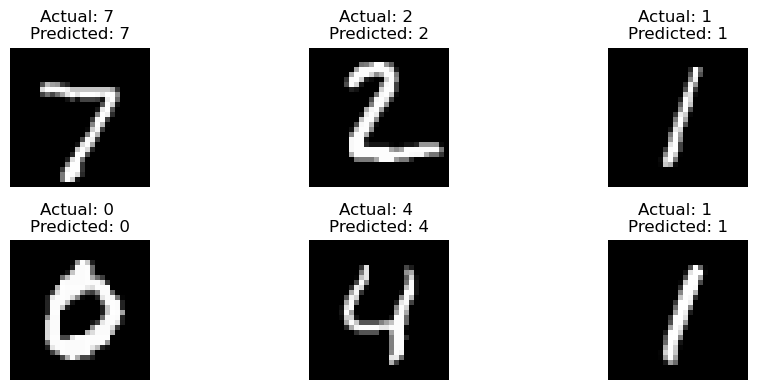

In [11]:
model.eval()
images , labels  = next(iter(test_loader))
with torch.no_grad():
    outputs =  model(images)
    _, predicted =torch.max( outputs , 1)
import matplotlib.pyplot as  plt
plt.figure(figsize=(10 , 4))
for i in range(6):
    plt.subplot( 2 , 3 , i+1)
    plt.imshow( images[i].squeeze() , cmap='gray')
    plt.title(f"Actual: {labels[i].item()} \nPredicted: {predicted[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

###  Visualized predictions
Visualized a few input images along with their corresponding predicted and actual labels.

### Final Report – Model Summary and Performance

####  Model Architecture
A neural network with -
Input layer-  784 neurons (flattened 28x28 image)
Hidden layer 1 - 128 neurons + ReLU
Hidden layer 2 - 64 neurons + ReLU


####  Training process
- Optimizer - Adam with learning rate 0.001
- Loss Function- CrossEntropyLoss
- Trained on 54k training images ( 90% of dataset)
- Used 5 epochs

####  Evaluation
- Validation Accuracy- 97.43%
- Test Accuracy- 97.61%